In [1]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [3]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff, index = 0, 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean
            index = i

    return tmp_mean,-tmp_diff, index, interval

In [5]:
_5w_1s_training_acc, _5w_1s_training_loss, _5w_1s_val_acc, _5w_1s_val_loss = read_file('mini_5w_1s/')
_5w_5s_training_acc, _5w_5s_training_loss, _5w_5s_val_acc, _5w_5s_val_loss = read_file('mini_5w_5s/')
_5w_1s_p_training_acc, _5w_1s_p_training_loss, _5w_1s_p_val_acc, _5w_1s_p_val_loss = read_file('mini_5w_1s_prove/')
_5w_5s_p_training_acc, _5w_5s_p_training_loss, _5w_5s_p_val_acc, _5w_5s_p_val_loss = read_file('mini_5w_5s_prove/')

_10w_1s_training_acc, _10w_1s_training_loss, _10w_1s_val_acc, _10w_1s_val_loss = read_file('mini_10w_1s/')
_10w_5s_training_acc, _10w_5s_training_loss, _10w_5s_val_acc, _10w_5s_val_loss = read_file('mini_10w_5s/')
_10w_1s_p_training_acc, _10w_1s_p_training_loss, _10w_1s_p_val_acc, _10w_1s_p_val_loss = read_file('mini_10w_1s_prove/')
_10w_5s_p_training_acc, _10w_5s_p_training_loss, _10w_5s_p_val_acc, _10w_5s_p_val_loss = read_file('mini_10w_5s_prove/')

In [6]:
def draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,save_op=False,alpha=1):

    color_selection = ['b','r','k','m','c','g']
    len_train = int(len(training_acc[0])*alpha)
    len_test = int(len(val_acc[0])*alpha)
    training = np.arange(0, len_train, 1)
    val = np.arange(0, len_train, int(len_train/len_test))
    fig = plt.figure(figsize=(25,16))
    fig.suptitle('Training and Validation results on Omniglot dataset', fontsize=24)

    plt.subplot(2, 2, 1)
    print(len_train,len_test)
    for i in range(len(le_name)):
        plt.plot(training, training_loss[i][0:len_train],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('train_loss', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 2)
    for i in range(len(le_name)):
        plt.plot(val, val_loss[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_loss', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 3)
    for i in range(len(le_name)):
        plt.plot(training, training_acc[i][0:len_train],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('train_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 4)
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)
    for i in range(len(le_name)):
        plt.plot(val, val_acc[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)
    #,prop={'size': 24}
    if save_op:
        fig.savefig('image.jpg')
    plt.show()

500 100


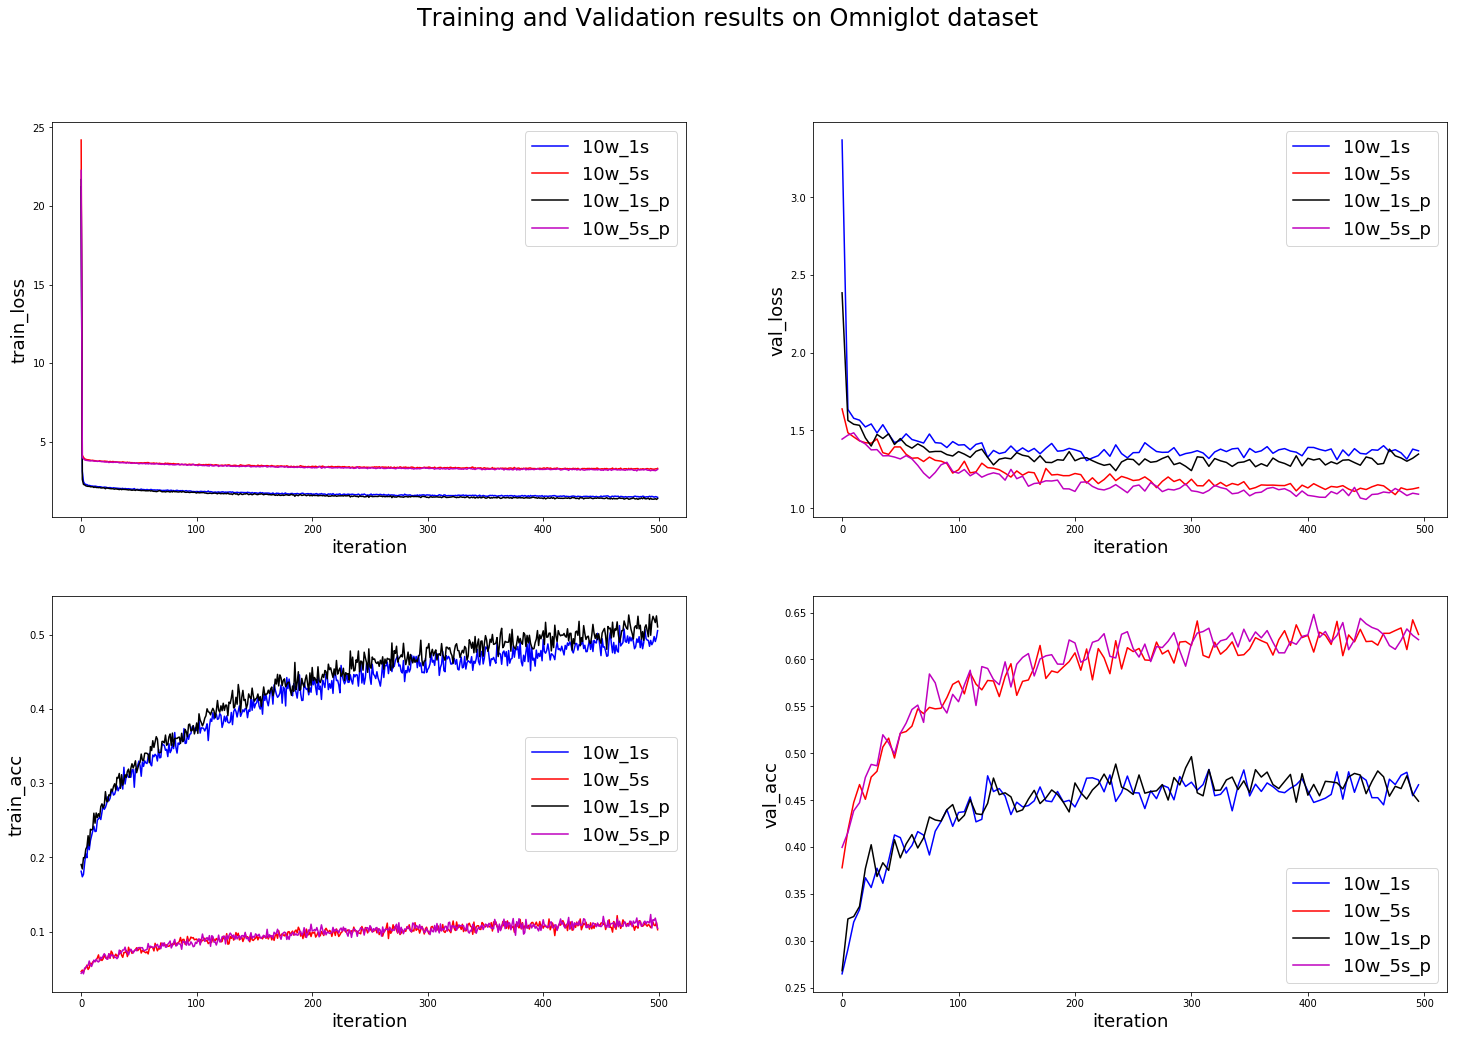

In [7]:
training_loss = [_10w_1s_training_loss[0:500],_10w_5s_training_loss[0:500],_10w_1s_p_training_loss[0:500],_10w_5s_p_training_loss[0:500]]
training_acc = [_10w_1s_training_acc[0:500],_10w_5s_training_acc[0:500],_10w_1s_p_training_acc[0:500],_10w_5s_p_training_acc[0:500]]
testing_loss = [_10w_1s_val_loss[0:100],_10w_5s_val_loss[0:100],_10w_1s_p_val_loss[0:100],_10w_5s_p_val_loss[0:100]]
testing_acc = [_10w_1s_val_acc[0:100],_10w_5s_val_acc[0:100],_10w_1s_p_val_acc[0:100],_10w_5s_p_val_acc[0:100]]
le_name = ['10w_1s','10w_5s','10w_1s_p','10w_5s_p']
draw_figure(training_acc,training_loss,testing_acc,testing_loss,le_name,save_op=False,alpha=1)

In [12]:
testing_acc = [_5w_1s_val_acc,_5w_5s_val_acc,_5w_1s_p_val_acc,_5w_5s_p_val_acc,
               _10w_1s_val_acc,_10w_5s_val_acc,_10w_1s_p_val_acc,_10w_5s_p_val_acc]
le_name = ['5w_1s','5w_5s','5w_1s_p','5w_5s_p','10w_1s','10w_5s','10w_1s_p','10w_5s_p']
for i in range(len(testing_acc)):
    print(str(le_name[i]),': ', max(testing_acc[i]))

5w_1s :  0.4933333349227905
5w_5s :  0.6469333347678184
5w_1s_p :  0.4856000033020973
5w_5s_p :  0.648666670024395
10w_1s :  0.48680000081658364
10w_5s :  0.6422666683793068
10w_1s_p :  0.4977333331108093
10w_5s_p :  0.6479999989271163


In [11]:
#i is length of list being calculated
for i in range(2,50,2):
    mean,diff,index,interval = return_highest(_10w_5s_p_val_acc,i)
    print('from {} to {}'.format(index,index+interval),mean,diff)

from 89 to 91 0.6409333330392837 0.037271479414908826
from 89 to 93 0.6369666668027638 0.00835533500982788
from 88 to 94 0.6325555556019147 0.00855003890753503
from 86 to 94 0.6306333331763744 0.009153448364730421
from 81 to 91 0.6298133336007595 0.00868242277685205
from 81 to 93 0.6303444447616736 0.0070265005972831585
from 80 to 94 0.6297714287255491 0.005933633023759377
from 78 to 94 0.6285916665941477 0.005441328123561018
from 80 to 98 0.62751851869954 0.005341145697313254
from 79 to 99 0.6272800000905991 0.004768077406136051
from 77 to 99 0.6264000000466 0.00448281893770186
from 69 to 93 0.6257055554663141 0.004510375438488534
from 67 to 93 0.6253384613417661 0.004260581255841389
from 66 to 94 0.6252476188540459 0.003946548073898826
from 69 to 99 0.6249244443873565 0.003812047012810904
from 61 to 93 0.6251416667085141 0.0035855726861473425
from 60 to 94 0.6249372549267376 0.0034014267809467924
from 62 to 98 0.6244851852456729 0.0033510935473112236
from 61 to 99 0.6246140351342528 